# DATA WRANGLING - KSI DATA (UPDATED)

In [3]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#import the data file for KSI - Killed or Seriously Injured from the Toronto Police Service webstie
data = pd.read_csv('KSIupdated.csv')
data

,X,Y,Index_,ACCNUM,YEAR,DATE,TIME,HOUR,STREET1,STREET2,...,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,Hood_ID,Neighbourhood,ObjectId
0,-8.829728e+06,5.419071e+06,3389067,893184,2006,2006/01/01 05:00:00+00,236,2,WOODBINE AVE,O CONNOR DR,...,NaN,Yes,Yes,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden (60),1
1,-8.829728e+06,5.419071e+06,3389068,893184,2006,2006/01/01 05:00:00+00,236,2,WOODBINE AVE,O CONNOR DR,...,NaN,Yes,Yes,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden (60),2
2,-8.829728e+06,5.419071e+06,3389069,893184,2006,2006/01/01 05:00:00+00,236,2,WOODBINE AVE,O CONNOR DR,...,NaN,Yes,Yes,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden (60),3
3,-8.829728e+06,5.419071e+06,3389070,893184,2006,2006/01/01 05:00:00+00,236,2,WOODBINE AVE,O CONNOR DR,...,NaN,Yes,Yes,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden (60),4
4,-8.829728e+06,5.419071e+06,3389071,893184,2006,2006/01/01 05:00:00+00,236,2,WOODBINE AVE,O CONNOR DR,...,NaN,Yes,Yes,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden (60),5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16088,-8.851734e+06,5.427217e+06,81356467,9002496688,2019,2019/12/27 05:00:00+00,2324,23,2901 JANE ST,JANE ST,...,NaN,NaN,NaN,Yes,NaN,NaN,NaN,25,Glenfield-Jane Heights (25),16089
16089,-8.851734e+06,5.427217e+06,81356468,9002496688,2019,2019/12/27 05:00:00+00,2324,23,2901 JANE ST,JANE ST,...,NaN,NaN,NaN,Yes,NaN,NaN,NaN,25,Glenfield-Jane Heights (25),16090
16090,-8.837083e+06,5.412746e+06,81340413,9002500260,2019,2019/12/28 05:00:00+00,1514,15,GERRARD ST,BAY ST,...,NaN,NaN,NaN,Yes,Yes,NaN,NaN,76,Bay Street Corridor (76),16091
16091,-8.837083e+06,5.412746e+06,81340414,9002500260,2019,2019/12/28 05:00:00+00,1514,15,GERRARD ST,BAY ST,...,NaN,NaN,NaN,Yes,Yes,NaN,NaN,76,Bay Street Corridor (76),16092


## SETTING DATETIME INDEX

In [5]:
#convert the DATE column into datetime data
data['DATE']=pd.to_datetime(data['DATE'])
data['DATE']=data['DATE'].apply(lambda x: x.date())
#convert the TIME column to be 4 digits using zfill
data['TIME'] = data['TIME'].apply(str)
data['TIME'] = [a.zfill(4) for a in data['TIME']]
#convert the TIME columns to represent time
Index = pd.to_datetime(data['DATE'].apply(str)+' '+data['TIME'].apply(str))
data = data.set_index(Index)

# Intial Data cleaning

In [6]:
#replace all empty values with NaN
data = data.replace(' ',np.nan )
data.columns

Index(['X', 'Y', 'Index_', 'ACCNUM', 'YEAR', 'DATE', 'TIME', 'HOUR', 'STREET1',
       'STREET2', 'OFFSET', 'ROAD_CLASS', 'District', 'WardNum', 'Division',
       'LATITUDE', 'LONGITUDE', 'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY',
       'LIGHT', 'RDSFCOND', 'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INVAGE',
       'INJURY', 'FATAL_NO', 'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT',
       'DRIVCOND', 'PEDTYPE', 'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT',
       'CYCCOND', 'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK',
       'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV',
       'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'Hood_ID', 'Neighbourhood',
       'ObjectId'],
      dtype='object')

In [7]:
#Dropping columns that are not of interest
data=data.drop(columns=['OFFSET', 'Division','ACCLOC', 'FATAL_NO', 
                        'Index_', 'YEAR', 'DATE', 'TIME', 'X', 'Y', 'WardNum'])

### CREATING AN ADDRESS COLUMN FOR ACCIDENT INTERSECTION

In [8]:
#combine the STREET2 and STREET2 into a list
data['ADDRESS'] = data[['STREET1', 'STREET2']].values.tolist()
#Remove NaN values from ADDRESS (as there are NaN values in STREET2)
data['ADDRESS'] = data['ADDRESS'].apply(lambda x: [i for i in x if i == i])
#Sort the list to ensure correct count in case of reverse orders of STREET1 and STREET2
data['ADDRESS'] = data['ADDRESS'].apply(sorted)
#Make the Address column look nice
data['ADDRESS'] = data['ADDRESS'].apply(lambda x:  ' and '.join(x) if len(x)==2 else ''.join(x))

In [9]:
data=data.drop(columns=['STREET1', 'STREET2'])

### CLEANING AND FILLING DISTRICT/WARD/NEIGHBOURHOOD COLUMNS

In [10]:
#There are only 4 districts in Toronto, We will replace all Toronto East York with Toronto and East York
data['District'].unique()

array(['Toronto and East York', 'North York', 'Scarborough',
       'Etobicoke York', nan], dtype=object)

In [11]:
data['District'] = data['District'].replace('Toronto East York', 'Toronto and East York')

In [12]:
emptydistrict = data.loc[data['District'].isnull()]

In [13]:
emptydistrict['ADDRESS'].unique()

array(['BATHURST ST and FINCH AVE W', 'EDDYSTONE AVE and OAKDALE RD',
       '26 HOMEWOOD AVE', 'HIGHWAY 400  S and STEELES AVE W',
       'ANNETTE ST and DUNDAS ST W', 'CHRISTIE ST and ST CLAIR AVE W'],
      dtype=object)

In [14]:
mapdict = {'BATHURST ST and FINCH AVE W':'North York', 'EDDYSTONE AVE and OAKDALE RD':'Etobicoke York',
       '26 HOMEWOOD AVE':'North York', 'HIGHWAY 400  S and STEELES AVE W':'North York',
       'ANNETTE ST and DUNDAS ST W':'Etobicoke York', 'CHRISTIE ST and ST CLAIR AVE W':'North York'}

In [15]:
#map from the mapdict above to clear up the NaN values in District
data['District'] = data['District'].fillna(data['ADDRESS'].map(mapdict))

In [16]:
#make sure that there is no NaN values in District columns
data.District.unique()

array(['Toronto and East York', 'North York', 'Scarborough',
       'Etobicoke York'], dtype=object)

### REPLACING ALL NAN VALUES WITH 'N' (for YES/NO columns) AND 'Unknown/Other' (for categorical columns)

In [17]:
#Replace Some NaN value with No
data[['PEDESTRIAN','CYCLIST', 'AUTOMOBILE','MOTORCYCLE', 'TRUCK', 'PASSENGER',
      'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY','TRSN_CITY_',
      'EMERG_VEH']] = data[['PEDESTRIAN','CYCLIST', 'AUTOMOBILE','MOTORCYCLE', 'TRUCK', 'PASSENGER',
      'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY','TRSN_CITY_VEH','EMERG_VEH']].replace(np.nan, 'No')
data[['LOCCOORD', 'ROAD_CLASS', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'INVTYPE', 'INVAGE', 
      'INJURY', 'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND','PEDTYPE', 'PEDCOND', 'CYCLISTYPE',
      'CYCACT','PEDACT','CYCCOND', 'IMPACTYPE']] = data[['LOCCOORD', 'ROAD_CLASS', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'INVTYPE', 'INVAGE', 
      'INJURY', 'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND','PEDTYPE', 'PEDCOND', 'CYCLISTYPE',
      'CYCACT','PEDACT','CYCCOND', 'IMPACTYPE']].replace(np.nan, 'Unknown/Other')
data[['LOCCOORD', 'ROAD_CLASS', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'INVTYPE', 'INVAGE', 
      'INJURY', 'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND','PEDTYPE', 'PEDCOND', 'CYCLISTYPE',
      'CYCACT','PEDACT','CYCCOND']] = data[['LOCCOORD', 'ROAD_CLASS', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'INVTYPE', 'INVAGE', 
      'INJURY', 'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND','PEDTYPE', 'PEDCOND', 'CYCLISTYPE',
      'CYCACT','PEDACT','CYCCOND']].replace(['Other', 'Unknown', 'unknown', 'Pending'], 'Unknown/Other')

## FINAL DATAFRAME AFTER INITIAL CLEANING

In [18]:
#Dropping Vehicle Owner since it is not of interest
data = data[data['INVTYPE']!='Vehicle Owner']
data
data.to_csv('ksidataupdated.csv')

## WRANGLING WITH THE FINAL DATA

### LOOKING AT ACCIDENT LOCATION (ACCNUM=ACCIDENT CODE)

In [19]:
data

,ACCNUM,HOUR,ROAD_CLASS,District,LATITUDE,LONGITUDE,LOCCOORD,TRAFFCTL,VISIBILITY,LIGHT,...,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,Hood_ID,Neighbourhood,ObjectId,ADDRESS,TRSN_CITY_
2006-01-01 02:36:00,893184,2,Major Arterial,Toronto and East York,43.699595,-79.318797,Intersection,No Control,Clear,Dark,...,Yes,Yes,No,Yes,No,60,Woodbine-Lumsden (60),1,O CONNOR DR and WOODBINE AVE,No
2006-01-01 02:36:00,893184,2,Major Arterial,Toronto and East York,43.699595,-79.318797,Intersection,No Control,Clear,Dark,...,Yes,Yes,No,Yes,No,60,Woodbine-Lumsden (60),2,O CONNOR DR and WOODBINE AVE,No
2006-01-01 02:36:00,893184,2,Major Arterial,Toronto and East York,43.699595,-79.318797,Intersection,No Control,Clear,Dark,...,Yes,Yes,No,Yes,No,60,Woodbine-Lumsden (60),3,O CONNOR DR and WOODBINE AVE,No
2006-01-01 02:36:00,893184,2,Major Arterial,Toronto and East York,43.699595,-79.318797,Intersection,No Control,Clear,Dark,...,Yes,Yes,No,Yes,No,60,Woodbine-Lumsden (60),4,O CONNOR DR and WOODBINE AVE,No
2006-01-01 02:36:00,893184,2,Major Arterial,Toronto and East York,43.699595,-79.318797,Intersection,No Control,Clear,Dark,...,Yes,Yes,No,Yes,No,60,Woodbine-Lumsden (60),5,O CONNOR DR and WOODBINE AVE,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27 23:24:00,9002496688,23,Major Arterial,Etobicoke York,43.752475,-79.516483,Mid-Block,No Control,Clear,"Dark, artificial",...,No,Yes,No,No,No,25,Glenfield-Jane Heights (25),16089,2901 JANE ST and JANE ST,No
2019-12-27 23:24:00,9002496688,23,Major Arterial,Etobicoke York,43.752475,-79.516483,Mid-Block,No Control,Clear,"Dark, artificial",...,No,Yes,No,No,No,25,Glenfield-Jane Heights (25),16090,2901 JANE ST and JANE ST,No
2019-12-28 15:14:00,9002500260,15,Major Arterial,Toronto and East York,43.658504,-79.384868,Intersection,Traffic Signal,Clear,Daylight,...,No,Yes,Yes,No,No,76,Bay Street Corridor (76),16091,BAY ST and GERRARD ST,No
2019-12-28 15:14:00,9002500260,15,Major Arterial,Toronto and East York,43.658504,-79.384868,Intersection,Traffic Signal,Clear,Daylight,...,No,Yes,Yes,No,No,76,Bay Street Corridor (76),16092,BAY ST and GERRARD ST,No


In [20]:
#Count the number of accidents happening in different kinds of road
data[['ACCNUM','ROAD_CLASS']].drop_duplicates().groupby(['ROAD_CLASS']).count()

,ACCNUM
ROAD_CLASS,
Collector,354
Expressway,6
Laneway,4
Local,289
Major Arterial,3981
Major Arterial Ramp,1
Minor Arterial,931
Unknown/Other,124


In [21]:
#Count the number of accident in different District
data[['ACCNUM','District']].drop_duplicates().groupby(['District']).count()

,ACCNUM
District,
Etobicoke York,1287
North York,1119
Scarborough,1242
Toronto and East York,2042


In [22]:
#Count the number of accident in different Neighbourhoods
data[['ACCNUM','Neighbourhood']].drop_duplicates().groupby(['Neighbourhood']).count().sort_values('ACCNUM', ascending=False)

,ACCNUM
Neighbourhood,
Waterfront Communities-The Island (77),205
West Humber-Clairville (1),166
Bay Street Corridor (76),134
Rouge (131),129
Woburn (137),116
...,...
Lawrence Park North (105),10
Guildwood (140),9
North St.James Town (74),9


### Looking at Addresses with High Number of Accidents over the year (>4) 

In [23]:
#Count the number of different District
addressgroup = data[['ACCNUM','ADDRESS']].drop_duplicates().groupby(['ADDRESS']).count()
#grouping addresses with high number of incident, more than 4
k = list(addressgroup.loc[addressgroup.ACCNUM>4].index)

In [24]:
highaccident = data.loc[data['ADDRESS'].isin(k)]

In [25]:
#There are 234 streets with high number of incident
len(highaccident.ACCNUM.unique())

451

In [26]:
#Most likely impacts seen in highaccident roads
highaccident[['ACCNUM','IMPACTYPE']].drop_duplicates().groupby(['IMPACTYPE']).count()

,ACCNUM
IMPACTYPE,
Angle,41
Approaching,10
Cyclist Collisions,28
Other,7
Pedestrian Collisions,205
Rear End,32
SMV Other,37
SMV Unattended Vehicle,1
Sideswipe,7


In [27]:
#Observe the traffic situation at the scene of the locations with high frequency incident
highaccident[['ACCNUM','INVTYPE']].drop_duplicates().groupby(['INVTYPE']).count()

,ACCNUM
INVTYPE,
Cyclist,29
Driver,428
Driver - Not Hit,2
Motorcycle Driver,36
Motorcycle Passenger,5
Other Property Owner,16
Passenger,122
Pedestrian,204
Truck Driver,31


### Observing Driver and Pedestrian Action 

In [28]:
data['DRIVACT'].value_counts()

Unknown/Other                   6858
Driving Properly                3704
Failed to Yield Right of Way    1355
Lost control                     814
Improper Turn                    491
Disobeyed Traffic Control        417
Following too Close              233
Exceeding Speed Limit            198
Speed too Fast For Condition     174
Improper Lane Change             110
Improper Passing                  91
Wrong Way on One Way Road          9
Speed too Slow                     3
Name: DRIVACT, dtype: int64

In [29]:
data['PEDACT'].value_counts()

Unknown/Other                            12088
Crossing with right of way                 790
Crossing, no Traffic Control               595
Crossing without right of way              345
On Sidewalk or Shoulder                    216
Running onto Roadway                       203
Crossing, Pedestrian Crossover              57
Person Getting on/off Vehicle               33
Coming From Behind Parked Vehicle           31
Walking on Roadway with Traffic             27
Playing or Working on Highway               23
Walking on Roadway Against Traffic          19
Crossing marked crosswalk without ROW       16
Pushing/Working on Vehicle                  12
Person Getting on/off School Bus             2
Name: PEDACT, dtype: int64

In [30]:
data['DRIVACT'].unique()

array(['Unknown/Other', 'Driving Properly', 'Lost control',
       'Improper Lane Change', 'Disobeyed Traffic Control',
       'Failed to Yield Right of Way', 'Speed too Fast For Condition',
       'Exceeding Speed Limit', 'Improper Turn', 'Improper Passing',
       'Following too Close', 'Wrong Way on One Way Road',
       'Speed too Slow'], dtype=object)

In [31]:
faultdictDriver = {'Lost control':'Maybe', 'Driving Properly':'No', 'Unknown/Other':'Unknown',
       'Improper Turn':'Yes', 'Failed to Yield Right of Way':'Yes',
       'Disobeyed Traffic Control':'Yes', 'Exceeding Speed Limit':'Yes',
       'Wrong Way on One Way Road':'Yes', 'Improper Lane Change':'Yes',
       'Following too Close':'Yes', 'Speed too Fast For Condition':'Yes',
       'Improper Passing':'Yes', 'Speed too Slow':'Yes'}

In [32]:
data1 = data[data['DRIVACT'].isin(['Unknown/Other','Driving Properly'])==False]

In [33]:
data2=data1[['ACCNUM', 'ACCLASS', 'INJURY','INVTYPE']].drop_duplicates()

In [34]:
data2

,ACCNUM,ACCLASS,INJURY,INVTYPE
2006-01-01 02:36:00,893184,Non-Fatal Injury,None,Driver
2006-01-01 03:15:00,909646,Non-Fatal Injury,None,Driver
2006-01-02 07:05:00,884090,Non-Fatal Injury,None,Driver
2006-01-07 23:25:00,882024,Fatal,Fatal,Driver
2006-01-08 15:07:00,887568,Non-Fatal Injury,Minimal,Driver
...,...,...,...,...
2019-12-22 18:34:00,9002465950,Fatal,Minimal,Driver
2019-12-23 06:57:00,9002468442,Non-Fatal Injury,None,Driver
2019-12-23 14:15:00,9002471073,Non-Fatal Injury,Major,Driver
2019-12-25 08:50:00,9002481518,Non-Fatal Injury,None,Driver


In [35]:
yeartrend = data[['ACCNUM']].drop_duplicates()
accidentcount = yeartrend.groupby([yeartrend.index.year]).count()
type(accidentcount)

pandas.core.frame.DataFrame

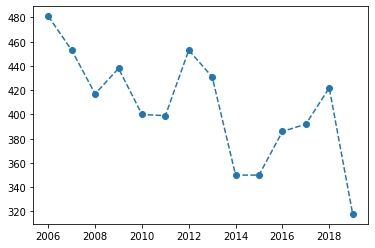

In [36]:
plt.plot(accidentcount.index.values, accidentcount.ACCNUM, marker = 'o', linestyle='--')
plt.show()

In [37]:
accidentcountM = yeartrend.groupby([yeartrend.index.month]).count()
accidentcountM

,ACCNUM
1,401
2,346
3,386
4,394
5,465
6,571
7,498
8,557
9,568
10,553


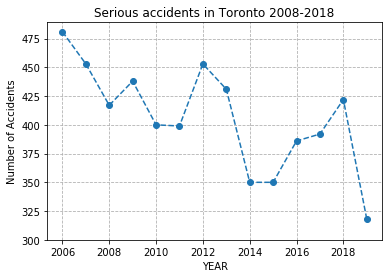

In [38]:
#Find no. of accident by year, use of the drop duplicates function since some accidents are are recorded more than once
data.index = pd.to_datetime(data.index)
trend = data[['ACCNUM']].drop_duplicates()
yeartrend = trend.groupby([trend.index.year]).count()
plt.plot(yeartrend.index.values, yeartrend.ACCNUM, marker = 'o', linestyle='--')
plt.xlabel('YEAR'), plt.ylabel('Number of Accidents')
plt.ylim(bottom=300), plt.grid(True, linestyle = '--')
plt.title('Serious accidents in Toronto 2008-2018')
plt.show()

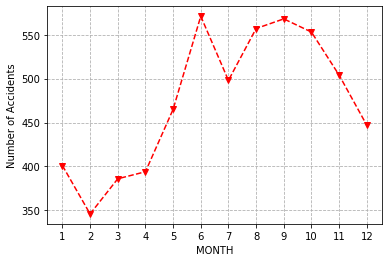

In [39]:
#Find no. of accident by year, use of the drop duplicates function since some accidents are are recorded more than once
monthtrend = trend.groupby([trend.index.month]).count()
plt.plot(monthtrend.index.values, monthtrend.ACCNUM, marker = 'v', linestyle='--', color='r')
plt.xlabel('MONTH'), plt.ylabel('Number of Accidents')
plt.grid(True, linestyle = '--'), plt.xticks(monthtrend.index.values)
plt.show()

In [40]:
#Finding the day of the week of occurrences
trend2 = trend.copy()
trend2.index = trend2.index.dayofweek
#Create a data count table by day of the week
daytrend = trend2.groupby(trend2.index).count()
days = {0:'MON',1:'TUE',2:'WED',3:'THUR',4:'FRI',5:'SAT',6:'SUN'}
daytrend.index=daytrend.index.map(days)

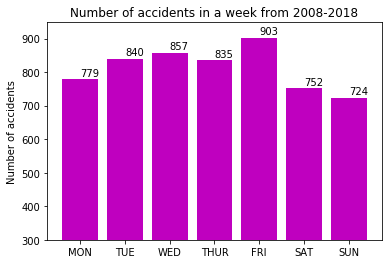

In [41]:
plt.bar(daytrend.index.values, daytrend.ACCNUM, color='m')
plt.title('Number of accidents in a week from 2008-2018')
plt.ylabel('Number of accidents')
plt.ylim(bottom = 300)
xlocs=plt.xticks()
for i, v in enumerate(daytrend.ACCNUM):
    plt.text(s= str(v), x = i, y=v+10)
plt.show()

In [42]:
a = list(trend2.loc[4,:].ACCNUM)
fridaydata = data.loc[data.ACCNUM.isin(a)]
fridaydata = fridaydata.loc[fridaydata.AG_DRIV =='Yes']
k = fridaydata[['ACCNUM', 'District']]

In [43]:
len(k.ACCNUM.unique())

451

In [44]:
a1 = list(trend2.loc[0,:].ACCNUM)
mondaydata = data.loc[data.ACCNUM.isin(a1)]
fridaydata = fridaydata.loc[fridaydata.AG_DRIV =='Yes']
k = fridaydata[['ACCNUM', 'District']]

In [45]:
data.loc[data['INVTYPE']=='Pedestrian']

,ACCNUM,HOUR,ROAD_CLASS,District,LATITUDE,LONGITUDE,LOCCOORD,TRAFFCTL,VISIBILITY,LIGHT,...,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,Hood_ID,Neighbourhood,ObjectId,ADDRESS,TRSN_CITY_
2006-01-02 07:05:00,884090,7,Major Arterial,Toronto and East York,43.652892,-79.406253,Mid-Block,No Control,Unknown/Other,"Dark, artificial",...,No,No,No,No,No,78,Kensington-Chinatown (78),15,BATHURST ST and DUNDAS ST W,No
2006-01-04 19:40:00,885782,19,Major Arterial,Toronto and East York,43.655145,-79.433590,Mid-Block,Traffic Signal,Rain,Dark,...,No,No,No,No,No,83,Dufferin Grove (83),17,DUFFERIN ST and SYLVAN AVE,No
2006-01-06 22:10:00,882079,22,Major Arterial,North York,43.777056,-79.347858,Intersection,Traffic Signal,Clear,"Dark, artificial",...,No,No,No,No,No,47,Don Valley Village (47),19,DON MILLS RD and LEITH HILL RD,No
2006-01-08 18:28:00,882497,18,Major Arterial,Etobicoke York,43.721445,-79.558090,Intersection,Pedestrian Crossover,Clear,Dark,...,No,Yes,No,No,No,5,Elms-Old Rexdale (5),32,GOLFDOWN DR and ISLINGTON AVE,No
2006-01-09 14:35:00,882174,14,Major Arterial,Scarborough,43.769445,-79.282290,Intersection,Traffic Signal,Clear,Daylight,...,No,No,No,No,No,126,Dorset Park (126),35,GLAMORGAN AVE and KENNEDY RD,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-22 18:34:00,9002465950,18,Major Arterial,Scarborough,43.781672,-79.233852,Intersection,Traffic Signal,Unknown/Other,Dark,...,No,No,No,No,No,137,Woburn (137),16080,MARKHAM RD and PROGRESS AVE,No
2019-12-23 06:57:00,9002468442,6,Minor Arterial,Toronto and East York,43.678390,-79.464794,Intersection,Traffic Signal,Clear,Dawn,...,No,Yes,No,No,No,91,Weston-Pellam Park (91),16083,OLD WESTON RD and TURNBERRY AVE,No
2019-12-25 08:50:00,9002481518,8,Major Arterial,North York,43.775104,-79.347011,Intersection,Traffic Signal,Clear,Daylight,...,No,Yes,No,No,No,47,Don Valley Village (47),16088,DON MILLS RD and SHEPPARD AVE E,No
2019-12-27 23:24:00,9002496688,23,Major Arterial,Etobicoke York,43.752475,-79.516483,Mid-Block,No Control,Clear,"Dark, artificial",...,No,Yes,No,No,No,25,Glenfield-Jane Heights (25),16090,2901 JANE ST and JANE ST,No


In [46]:
data.INVTYPE.unique()

array(['Passenger', 'Driver', 'Other Property Owner', 'Pedestrian',
       'Motorcycle Driver', 'Cyclist', 'Truck Driver', 'Unknown/Other',
       'In-Line Skater', 'Driver - Not Hit', 'Motorcycle Passenger',
       'Moped Driver', 'Wheelchair', 'Pedestrian - Not Hit',
       'Trailer Owner', 'Witness', 'Cyclist Passenger'], dtype=object)